Домашнє завдання
В якості домашнього завдання пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.
Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.
Порівняйте результати та зробіть висновки.

In [4]:
from tensorflow import keras
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional
from keras import metrics

RNN

In [58]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
maxlen = 500
batch_size = 64

In [59]:
train_data.shape, test_data.shape

((25000,), (25000,))

In [60]:
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

In [61]:
train_data.shape, test_data.shape

((25000, 500), (25000, 500))

In [62]:
model = Sequential()
model.add(Embedding(10000, 64))
model.add(Dropout(0.5))
model.add(SimpleRNN(64))
model.add(Dense(1, activation="sigmoid"))

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 64)          640000    
                                                                 
 dropout_7 (Dropout)         (None, None, 64)          0         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 648321 (2.47 MB)
Trainable params: 648321 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
history = model.fit(
    train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.3
)

Epoch 1/5
274/274 [==============================] - 21s 75ms/step - loss: 0.6449 - accuracy: 0.6086 - val_loss: 0.4648 - val_accuracy: 0.7848
Epoch 2/5
274/274 [==============================] - 21s 77ms/step - loss: 0.4590 - accuracy: 0.7950 - val_loss: 0.4094 - val_accuracy: 0.8251
Epoch 3/5
274/274 [==============================] - 22s 79ms/step - loss: 0.3654 - accuracy: 0.8470 - val_loss: 0.3738 - val_accuracy: 0.8469
Epoch 4/5
274/274 [==============================] - 22s 79ms/step - loss: 0.3857 - accuracy: 0.8369 - val_loss: 0.3999 - val_accuracy: 0.8369
Epoch 5/5
274/274 [==============================] - 22s 79ms/step - loss: 0.3111 - accuracy: 0.8720 - val_loss: 0.3770 - val_accuracy: 0.8513


Відображення результатів:

In [66]:
def history_graph(history):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(acc) + 1)

    plt.plot(
        epochs, acc, "bo", label="Точність на тренуванні"
    )  
    plt.plot(
        epochs, val_acc, "b", label="Точність на валідації"
    )  
    plt.title("Точність тренування і валідації")  
    plt.legend() 

    plt.figure()

    plt.plot(
        epochs, loss, "bo", label="Втрати на тренуванні"
    )  
    plt.plot(
        epochs, val_loss, "b", label="Втрати на валідації"
    )  
    plt.title("Втрати тренування і валідації")  
    plt.legend()  

    plt.show()  

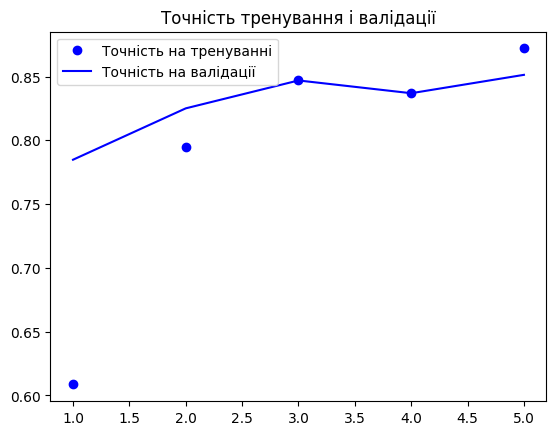

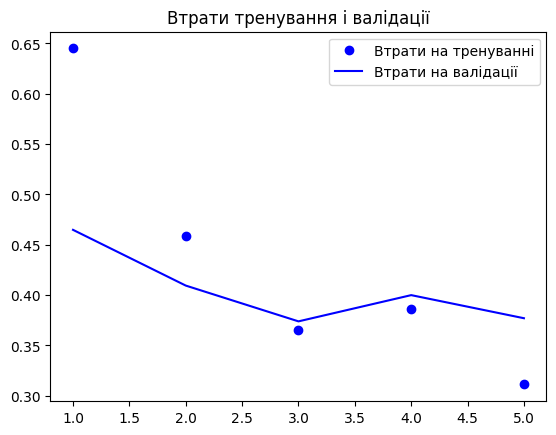

In [67]:
history_graph(history)

Прогнозування з використанням навченої моделі:

In [102]:
def binary_predict(predict, model_name):
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predict]

    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {test_labels[i]}")

    test_loss, test_acc = model_name.evaluate(test_data, test_labels)
    print("Test Loss: {}".format(test_loss))
    print("Test Accuracy: {}".format(test_acc))
    return test_acc

In [103]:
predictions = model.predict(test_data)
test_acc = binary_predict(predictions, model)
acc_dict = {"model_rnn": test_acc}

782/782 [==============================] - 11s 14ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 11s 14ms/step - loss: 0.3827 - accuracy: 0.8462
Test Loss: 0.3827444016933441
Test Accuracy: 0.8461599946022034


LSTM

In [71]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 64))
model_lstm.add(Dropout(0.5))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(1, activation="sigmoid"))

In [72]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          640000    
                                                                 
 dropout_8 (Dropout)         (None, None, 64)          0         
                                                                 
 lstm_4 (LSTM)               (None, 64)                33024     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 673089 (2.57 MB)
Trainable params: 673089 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
model_lstm.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [75]:
history_lstm = model_lstm.fit(
    train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.3
)

Epoch 1/5
274/274 [==============================] - 45s 159ms/step - loss: 0.5485 - accuracy: 0.7103 - val_loss: 0.3981 - val_accuracy: 0.8277
Epoch 2/5
274/274 [==============================] - 45s 163ms/step - loss: 0.3416 - accuracy: 0.8584 - val_loss: 0.3108 - val_accuracy: 0.8731
Epoch 3/5
274/274 [==============================] - 47s 170ms/step - loss: 0.2779 - accuracy: 0.8890 - val_loss: 0.5002 - val_accuracy: 0.8289
Epoch 4/5
274/274 [==============================] - 46s 170ms/step - loss: 0.2455 - accuracy: 0.9087 - val_loss: 0.3707 - val_accuracy: 0.8743
Epoch 5/5
274/274 [==============================] - 46s 166ms/step - loss: 0.2241 - accuracy: 0.9148 - val_loss: 0.3220 - val_accuracy: 0.8640


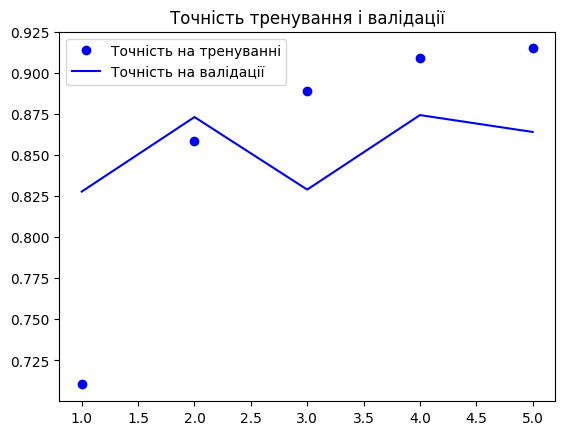

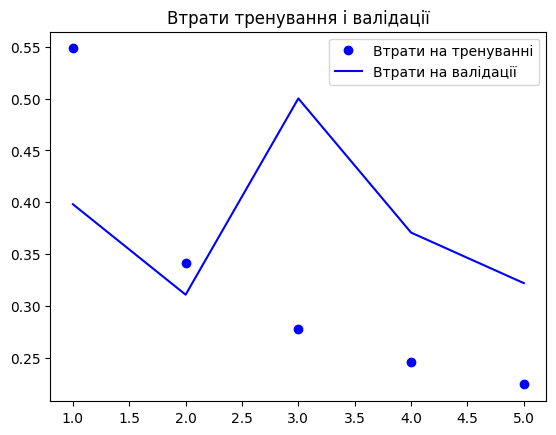

In [76]:
history_graph(history_lstm)

In [104]:
predictions_lstm = model_lstm.predict(test_data)
test_acc = binary_predict(predictions_lstm, model_lstm)
acc_dict['model_lstm'] = test_acc

782/782 [==============================] - 28s 36ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 28s 36ms/step - loss: 0.3271 - accuracy: 0.8617
Test Loss: 0.3271219730377197
Test Accuracy: 0.8617200255393982


BRNN

In [82]:
model_brnn = Sequential()
model_brnn.add(Embedding(10000, 64))
model_brnn.add(Dropout(0.5))
model_brnn.add(Bidirectional(LSTM(64)))
model_brnn.add(Dense(1, activation="sigmoid"))

In [83]:
model_brnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 64)          640000    
                                                                 
 dropout_10 (Dropout)        (None, None, 64)          0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 706177 (2.69 MB)
Trainable params: 706177 (2.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
model_brnn.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)

In [85]:
history_brnn = model_brnn.fit(
    train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.3
)

Epoch 1/5
274/274 [==============================] - 102s 363ms/step - loss: 0.5528 - accuracy: 0.7117 - val_loss: 0.3854 - val_accuracy: 0.8371
Epoch 2/5
274/274 [==============================] - 100s 364ms/step - loss: 0.3441 - accuracy: 0.8582 - val_loss: 0.3073 - val_accuracy: 0.8736
Epoch 3/5
274/274 [==============================] - 96s 351ms/step - loss: 0.2867 - accuracy: 0.8858 - val_loss: 0.3334 - val_accuracy: 0.8571
Epoch 4/5
274/274 [==============================] - 95s 349ms/step - loss: 0.2530 - accuracy: 0.8995 - val_loss: 0.2858 - val_accuracy: 0.8821
Epoch 5/5
274/274 [==============================] - 96s 351ms/step - loss: 0.2243 - accuracy: 0.9156 - val_loss: 0.3059 - val_accuracy: 0.8895


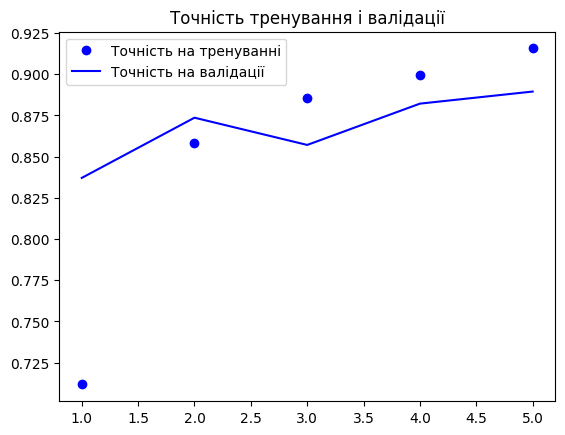

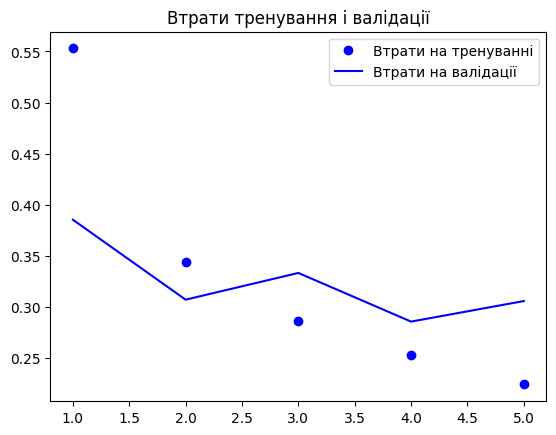

In [86]:
history_graph(history_brnn)

In [105]:
predictions_brnn = model_brnn.predict(test_data)
test_acc = binary_predict(predictions_brnn, model_brnn)
acc_dict['model_brnn'] = test_acc

782/782 [==============================] - 40s 51ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 41s 52ms/step - loss: 0.3217 - accuracy: 0.8802
Test Loss: 0.3216704726219177
Test Accuracy: 0.8801599740982056


DRNN

In [88]:
model_drnn = Sequential()
model_drnn.add(Embedding(10000, 64))
model_drnn.add(Dropout(0.5))
model_drnn.add(Bidirectional(LSTM(64, return_sequences=True)))
model_drnn.add(Bidirectional(LSTM(64)))
model_drnn.add(Dense(1, activation="sigmoid"))

In [89]:
model_drnn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, None, 64)          640000    
                                                                 
 dropout_11 (Dropout)        (None, None, 64)          0         
                                                                 
 bidirectional_5 (Bidirecti  (None, None, 128)         66048     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 804993 (3.07 MB)
Trainable params: 8049

In [90]:
model_drnn.compile(
    optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"]
)


In [91]:
history_drnn = model_drnn.fit(
    train_data, train_labels, epochs=5, batch_size=batch_size, validation_split=0.3
)

Epoch 1/5
274/274 [==============================] - 184s 656ms/step - loss: 0.5564 - accuracy: 0.6885 - val_loss: 0.4230 - val_accuracy: 0.8243
Epoch 2/5
274/274 [==============================] - 184s 670ms/step - loss: 0.3378 - accuracy: 0.8610 - val_loss: 0.4104 - val_accuracy: 0.8540
Epoch 3/5
274/274 [==============================] - 184s 671ms/step - loss: 0.2753 - accuracy: 0.8945 - val_loss: 0.4023 - val_accuracy: 0.8385
Epoch 4/5
274/274 [==============================] - 185s 675ms/step - loss: 0.2425 - accuracy: 0.9074 - val_loss: 0.3183 - val_accuracy: 0.8632
Epoch 5/5
274/274 [==============================] - 189s 689ms/step - loss: 0.2137 - accuracy: 0.9208 - val_loss: 0.3223 - val_accuracy: 0.8621


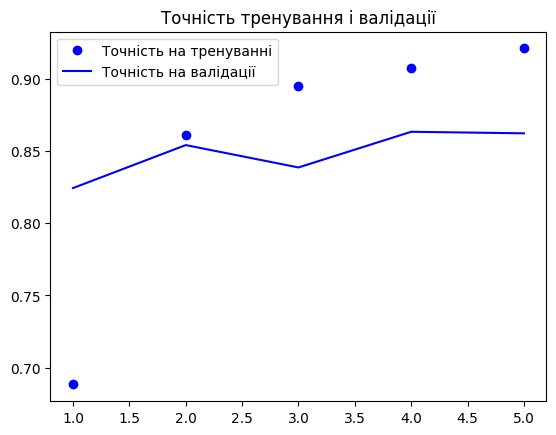

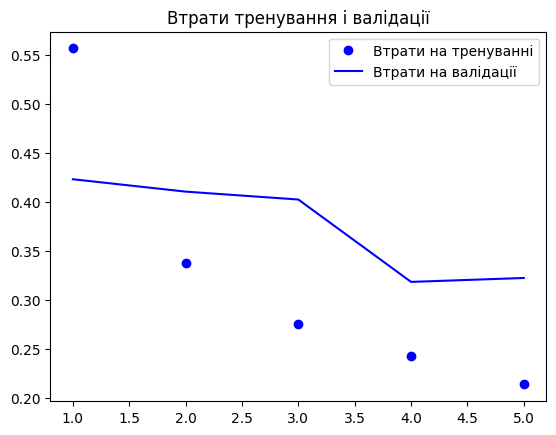

In [92]:
history_graph(history_drnn)

In [106]:
predictions_drnn = model_drnn.predict(test_data)
test_acc = binary_predict(predictions_drnn, model_drnn)
acc_dict['model_drnn'] = test_acc

782/782 [==============================] - 76s 97ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 77s 98ms/step - loss: 0.3273 - accuracy: 0.8604
Test Loss: 0.32733315229415894
Test Accuracy: 0.8603600263595581


In [107]:
acc_dict

{'model_rnn': 0.8461599946022034,
 'model_lstm': 0.8617200255393982,
 'model_brnn': 0.8801599740982056,
 'model_drnn': 0.8603600263595581}

Були побудовані наступні чотири рекурентні нейронні мережі RNN, LSTM, двостороння та глибока, які класифікують рецензії із датасету imdb. Мережі мають подібну будову.  Найменьша точність виявлена у RNN мережі. Найбільшу точність показала двонаправлена (BRNN) нейрона мережа, трохи поступаються їй за точностю проста LSTM і глибока мережі. За часом розрахунків BRNN і DRNN мережі повільніші в зрівнянні RNN і LSTM мережами. Сила BRNN виявляється при роботі з послідовними даними. Здатність отримувати доступ до ознак вхідних даних, як минулих, так і майбутніх, робить BRNN потужними для проблем типу "послідовність-до-послідовності". В нашому випадку класифікації рецензій в цьому немає необхідності, і тому навіть при найбільшій точності викорситання BRNN мережі не є найкрищим вибором.
